In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import traci
from tensorflow.keras.models import load_model

In [2]:
# Load and preprocess data
data = pd.read_csv('traffic_data.csv', encoding='utf-8')

# Filter numeric columns
numeric_cols = ['car_count', 'waiting_time']
lane_ids = data['lane_id'].unique()
scalers = {}

# Normalize data per lane
for lane_id in lane_ids:
    lane_data = data[data['lane_id'] == lane_id][numeric_cols]
    scaler = MinMaxScaler(feature_range=(0, 1))
    scalers[lane_id] = scaler
    data.loc[data['lane_id'] == lane_id, numeric_cols] = scaler.fit_transform(lane_data)

# Prepare data for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), :]
        X.append(a)
        Y.append(dataset[i + look_back, 1])  # Using waiting_time for Y (predicting green light duration)
    return np.array(X), np.array(Y)

look_back = 3
X_list, Y_list = [], []

# Create dataset for each lane
for lane_id in lane_ids:
    lane_data = data[data['lane_id'] == lane_id][numeric_cols].values
    X_lane, Y_lane = create_dataset(lane_data, look_back)
    X_list.append(X_lane)
    Y_list.append(Y_lane)

# Combine datasets from all lanes
X = np.concatenate(X_list, axis=0)
Y = np.concatenate(Y_list, axis=0)
X = np.reshape(X, (X.shape[0], X.shape[1], X.shape[2]))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 2)))  # Input shape adjusted to (look_back, 2)
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17020\1214201457.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.         0.         0.         0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.33333333 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 1.         0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.         0.         0.         0.
 0.         0.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['lane_id'] == lane_id, numeric_cols] = scaler.fit_transform(lane_data)
c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

In [3]:
# Train the model
model.fit(X, Y, epochs=10, batch_size=32, verbose=2)

# Save the trained model
model.save('traffic_light_model.h5')

Epoch 1/10
141/141 - 4s - 28ms/step - loss: 0.0024
Epoch 2/10
141/141 - 0s - 3ms/step - loss: 7.0132e-04
Epoch 3/10
141/141 - 0s - 3ms/step - loss: 5.7044e-04
Epoch 4/10
141/141 - 0s - 3ms/step - loss: 6.5745e-04
Epoch 5/10
141/141 - 0s - 3ms/step - loss: 5.0779e-04
Epoch 6/10
141/141 - 0s - 3ms/step - loss: 6.0530e-04
Epoch 7/10
141/141 - 0s - 3ms/step - loss: 5.4210e-04
Epoch 8/10
141/141 - 0s - 3ms/step - loss: 4.3790e-04
Epoch 9/10
141/141 - 0s - 3ms/step - loss: 4.9541e-04
Epoch 10/10
141/141 - 0s - 3ms/step - loss: 4.7064e-04


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━

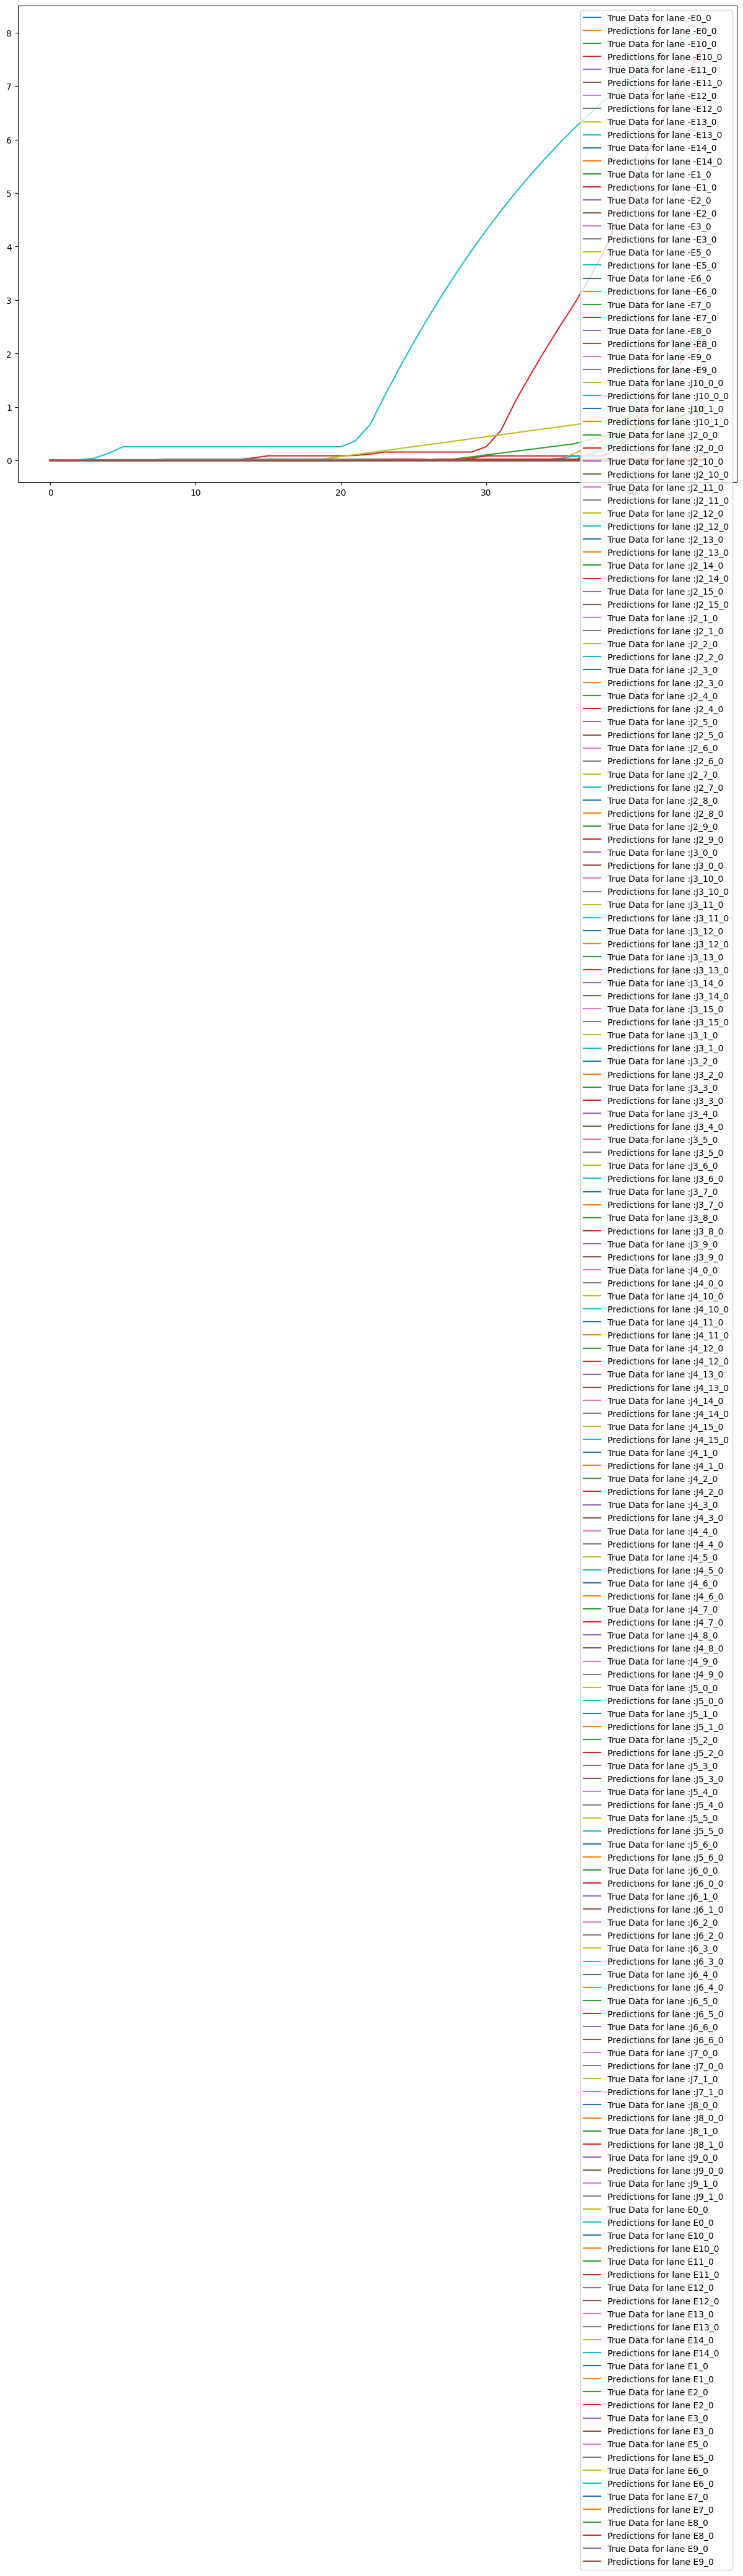

In [11]:
# Predict for each lane
predictions_list = []

for lane_id in lane_ids:
    lane_data = data[data['lane_id'] == lane_id][numeric_cols].values
    X_lane, _ = create_dataset(lane_data, look_back)
    X_lane = np.reshape(X_lane, (X_lane.shape[0], X_lane.shape[1], X_lane.shape[2]))
    
    predictions = model.predict(X_lane)
    predictions = np.reshape(predictions, (-1, 1))  # Reshape predictions to match scaler's expectations
    scaler = scalers[lane_id]
    predictions = scaler.inverse_transform(np.hstack((np.zeros((predictions.shape[0], 1)), predictions)))[:, 1]  # Inverse transform with dummy first column
    predictions_list.append(predictions)

# Combine predictions for visualization
all_predictions = np.concatenate(predictions_list)

# Evaluate and plot results for each lane
plt.figure(figsize=(15, 10))

for lane_id in lane_ids:
    lane_data = data[data['lane_id'] == lane_id]
    true_data = lane_data['waiting_time'].values[look_back+1:]  # Adjust for look_back
    predictions = all_predictions[:len(true_data)]
    all_predictions = all_predictions[len(true_data):]

    plt.plot(true_data, label=f'True Data for lane {lane_id}')
    plt.plot(predictions, label=f'Predictions for lane {lane_id}')
    
plt.legend()
plt.show()


In [15]:
# TraCI Simulation Control

def get_traffic_data(lane_ids):
    data = []
    for lane_id in lane_ids:
        car_count = traci.lane.getLastStepVehicleNumber(lane_id)
        waiting_time = traci.lane.getWaitingTime(lane_id)
        data.append([car_count, waiting_time])
    return np.array(data)

def make_predictions(data, scaler, look_back=3):
    scaled_data = scaler.transform(data)
    X = []
    for i in range(len(scaled_data) - look_back):
        X.append(scaled_data[i:(i + look_back), :])
    X = np.array(X)
    predictions = model.predict(X)
    return predictions

# Start SUMO simulation with TraCI
sumoCmd = ["sumo", "-c", "configuration.sumo.cfg"]

try:
    traci.start(sumoCmd)
except traci.TraCIException:
    traci.close()
    traci.start(sumoCmd)

# Dynamically get all lane IDs
lane_ids = traci.lane.getIDList()
step = 0
look_back = 3
traffic_data = []

while step < 50:
    traci.simulationStep()

    current_data = get_traffic_data(lane_ids)
    traffic_data.append(current_data)

    if len(traffic_data) >= look_back:
        predictions = make_predictions(np.array(traffic_data[-look_back:]), scalers[lane_ids[0]])

        for i, lane_id in enumerate(lane_ids):
            green_time = predictions[i][0]
            traci.trafficlight.setPhaseDuration('traffic_light_id', green_time)

    step += 1

traci.close()

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


ValueError: Found array with dim 3. MinMaxScaler expected <= 2.